# Logistic Regression with Python

We'll be trying to predict a classification- survival or deceased.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# # Read the Titanic dataset from a CSV file
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

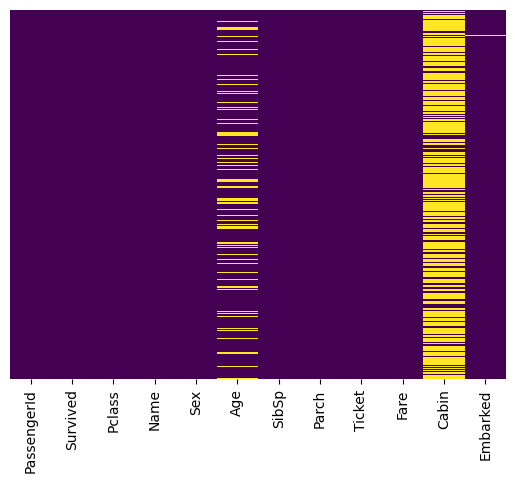

In [7]:
# Missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##  Pairplot

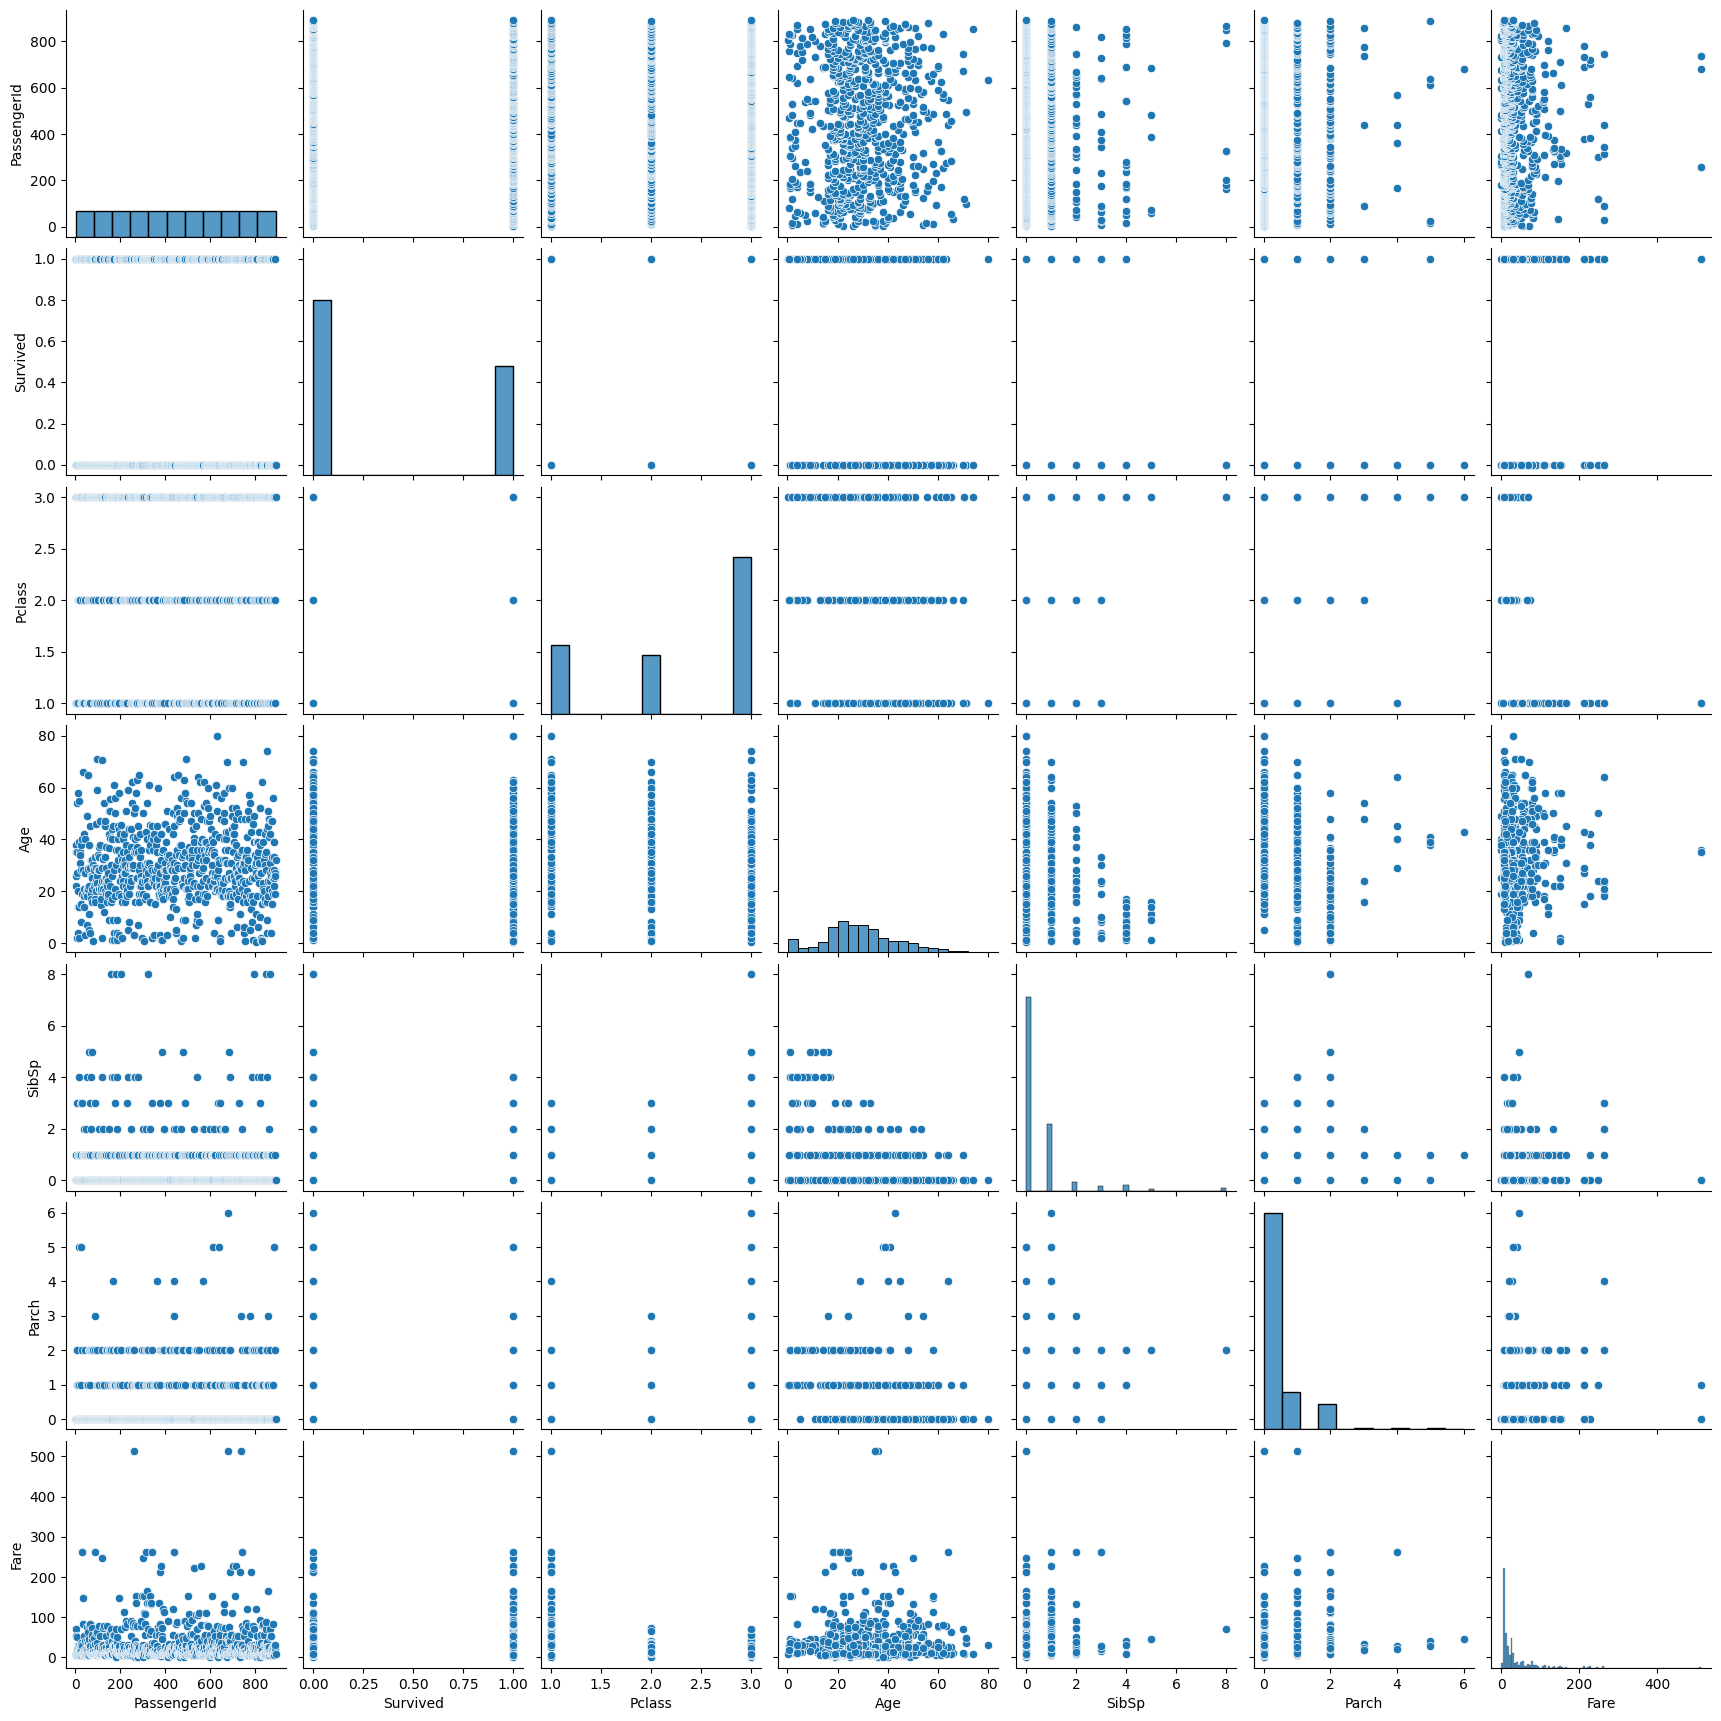

In [8]:
sns.pairplot(df)

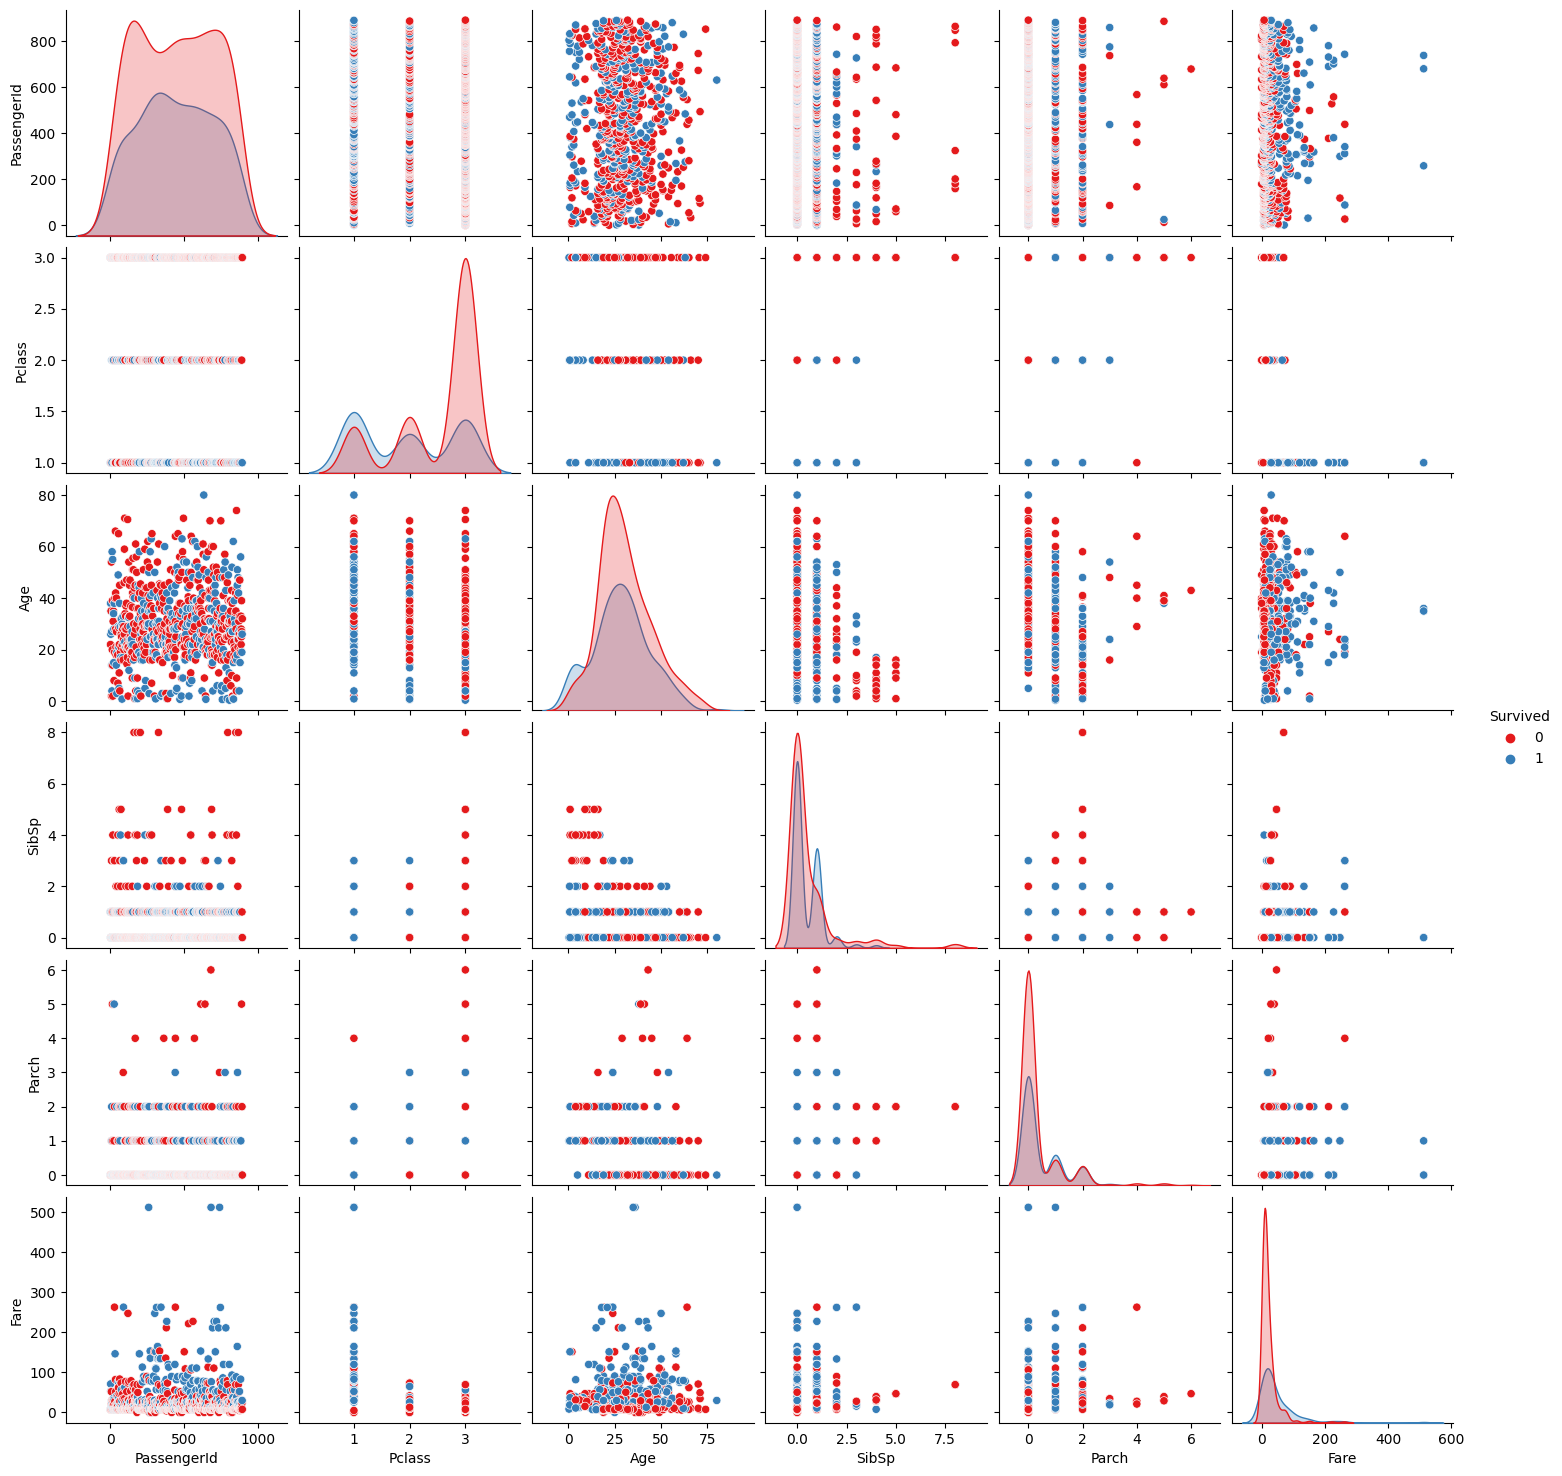

In [9]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='Survived', palette='Set1')
plt.show()

## Explore the distribution of categorical variables

### 1. Passenger Class Distribution

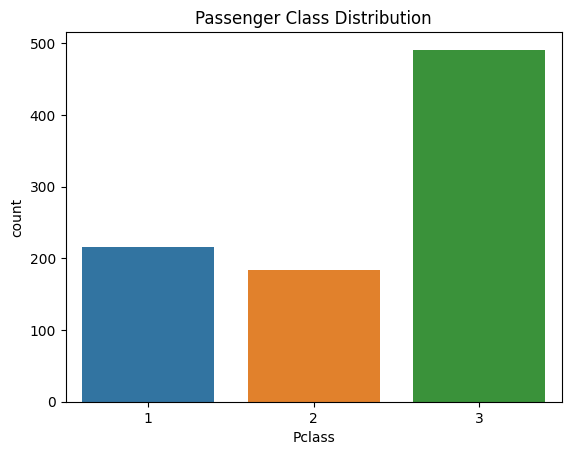

In [10]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

### 2. Gender Distribution

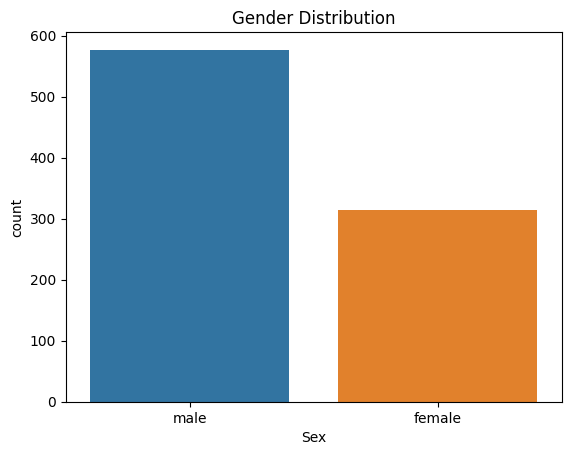

In [11]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

### 3. Port of Embarkation Distribution

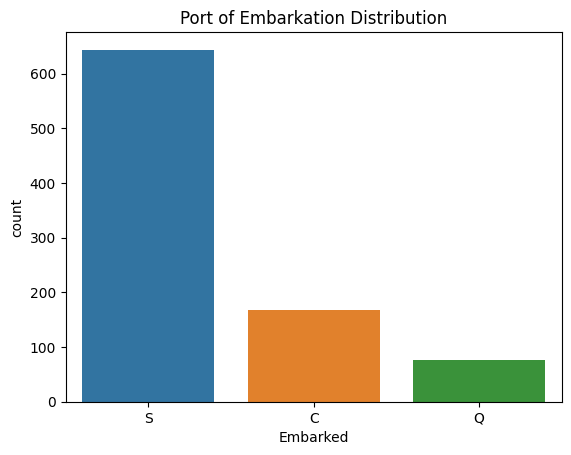

In [12]:
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation Distribution')
plt.show()

## Explore relationships between variables

### 4. Correlation Heatmap

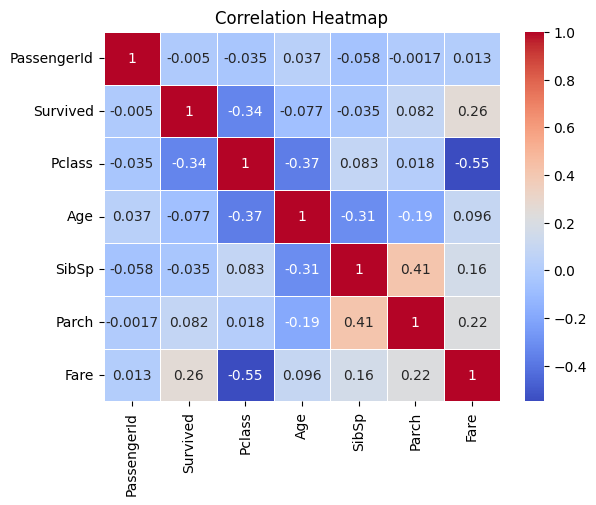

In [13]:
df1=df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Explore the distribution of numerical variables

### 5. Age Distribution

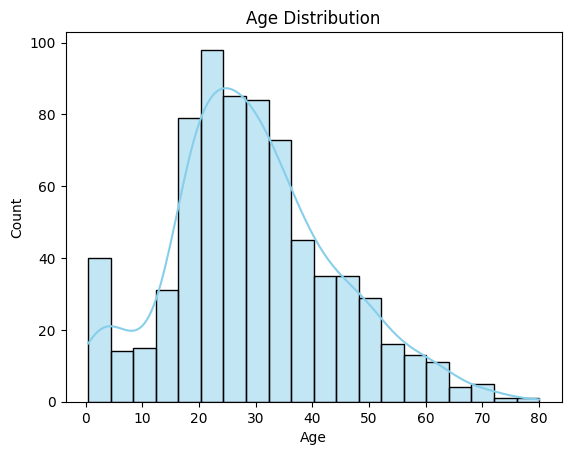

In [14]:
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### 6. Fare Distribution

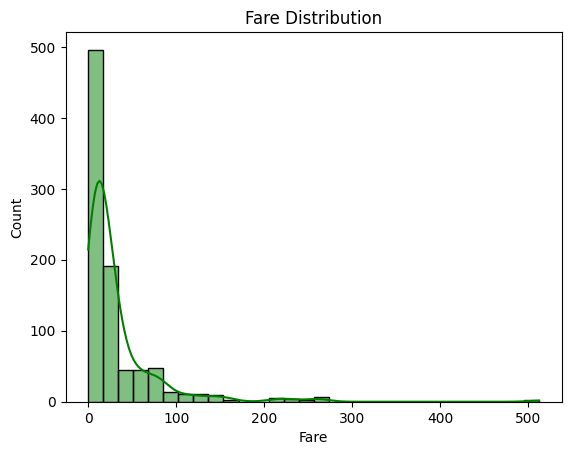

In [15]:
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

In [16]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Explore survival rates

### 7. Overall Survival Count

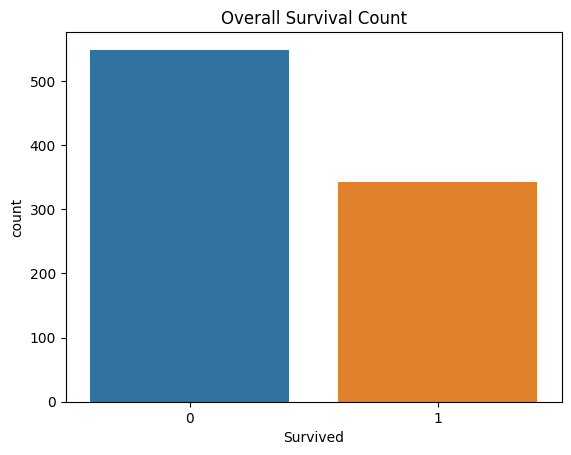

In [17]:
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count')
plt.show()

### Countplot for Gender with relationship to Survived

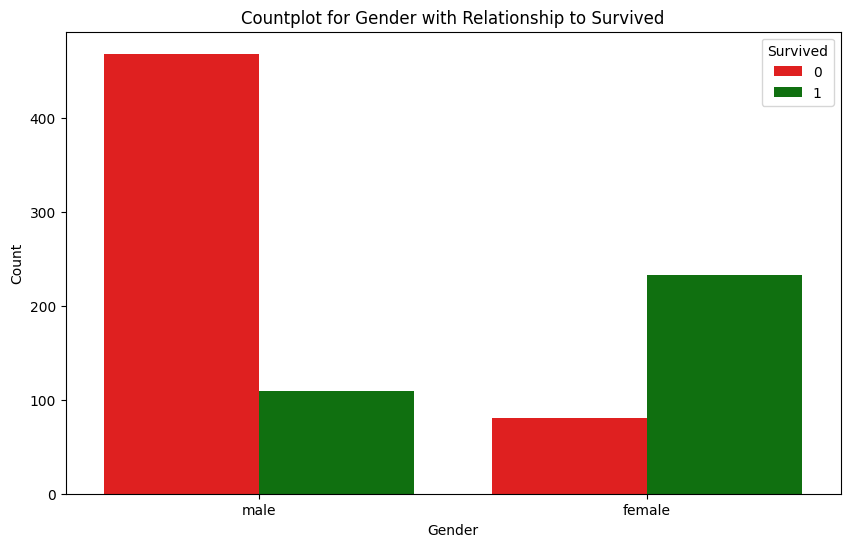

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Gender with Relationship to Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Countplot for Port of Embarkation with relationship to Survived

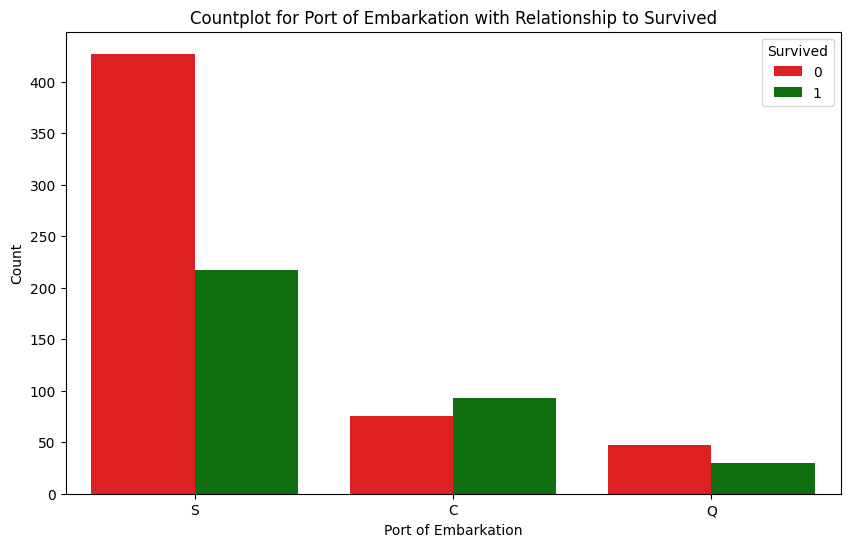

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Port of Embarkation with Relationship to Survived')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

### Countplot of Survival by Passenger Class

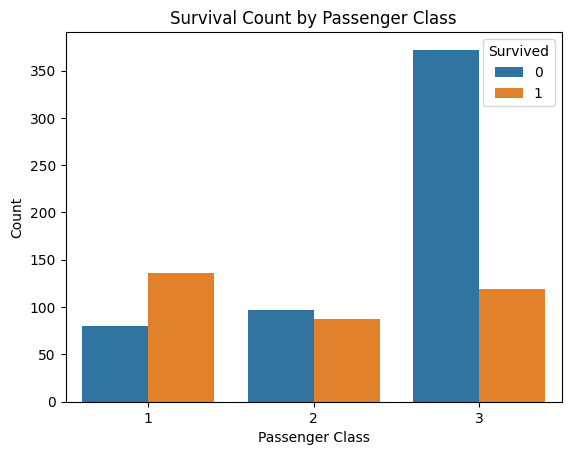

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

### Stacked Bar Plot of Survival Rate by Passenger Class and Gender

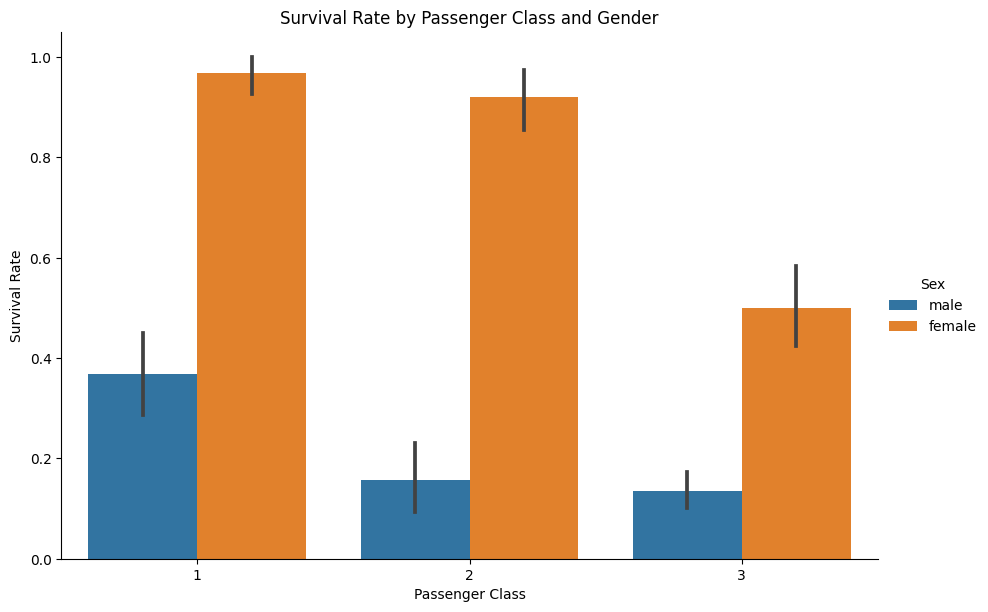

In [21]:
sns.catplot(x='Pclass', hue='Sex', y='Survived', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Violin Plot of Age by Passenger Class and Survival

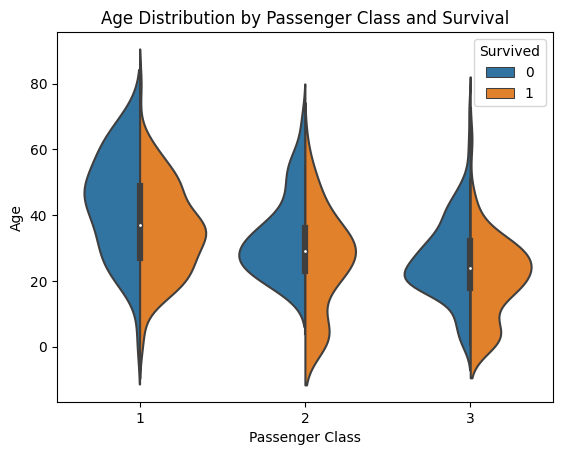

In [22]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

### FacetGrid of Survival Rate by Passenger Class and Embarkation Port

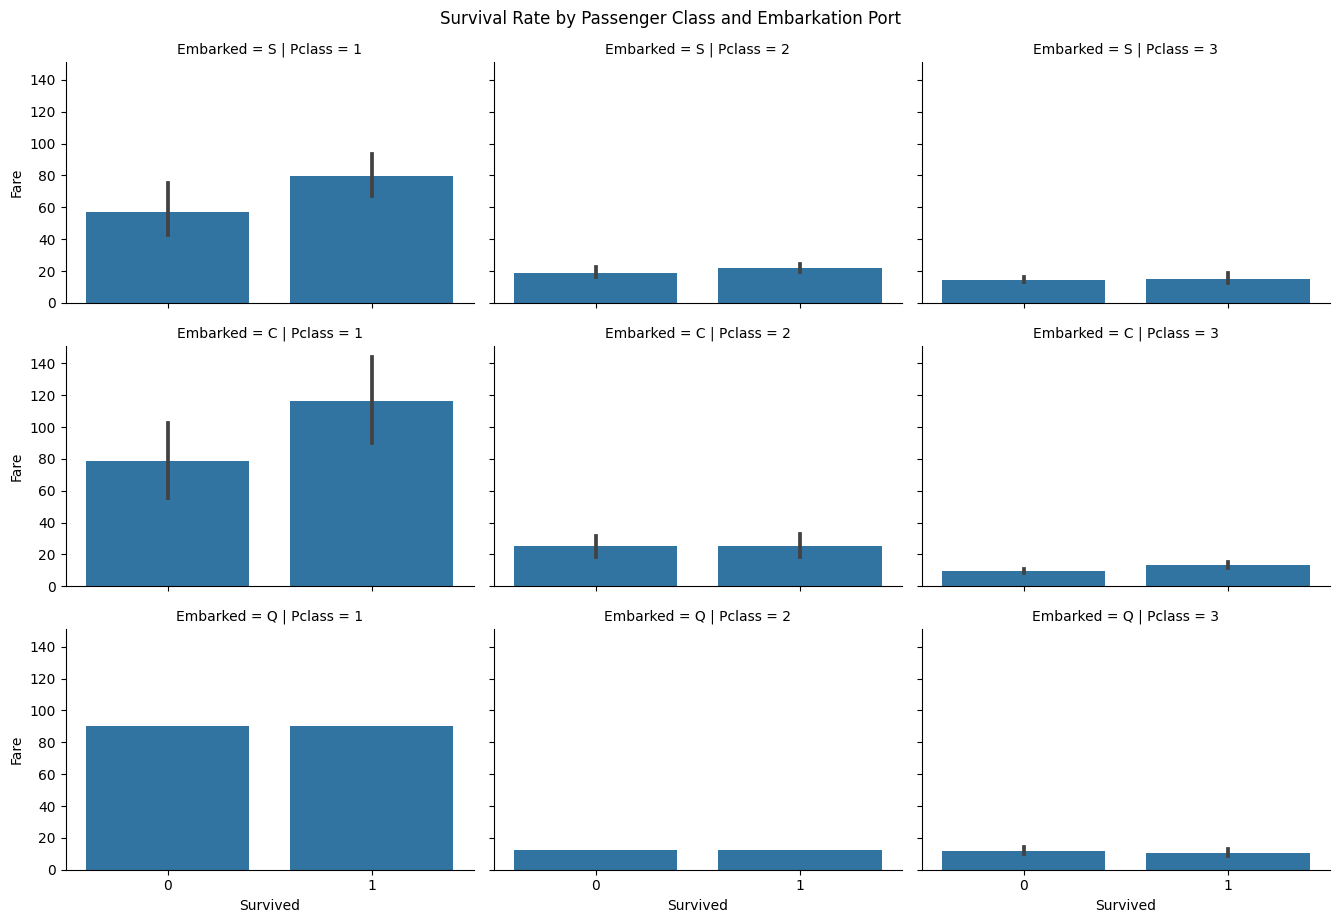

In [23]:
g = sns.FacetGrid(df, col='Pclass', row='Embarked', height=3, aspect=1.5)
g.map(sns.barplot, 'Survived', 'Fare')
g.set_axis_labels('Survived', 'Fare')
plt.suptitle('Survival Rate by Passenger Class and Embarkation Port', y=1.02)
plt.show()

### Survival Rate by Age Group

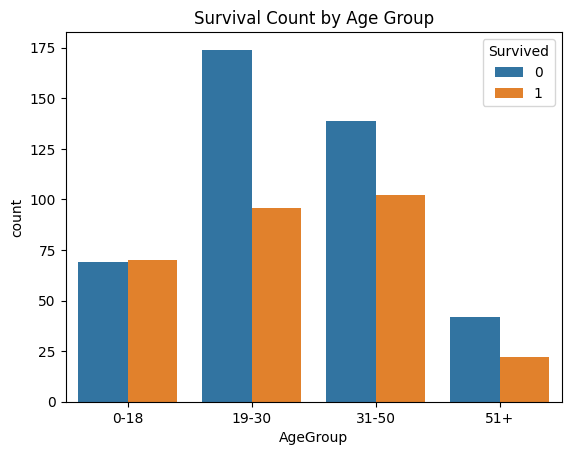

In [24]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival Count by Age Group')
plt.show()

#### KDE (Kernel Density Estimate) plot for Age by Survival
This Kernel Density Estimate plot provides a smoothed representation of the distribution of age for passengers who survived and did not survive. It helps visualize the density of age values for each survival group

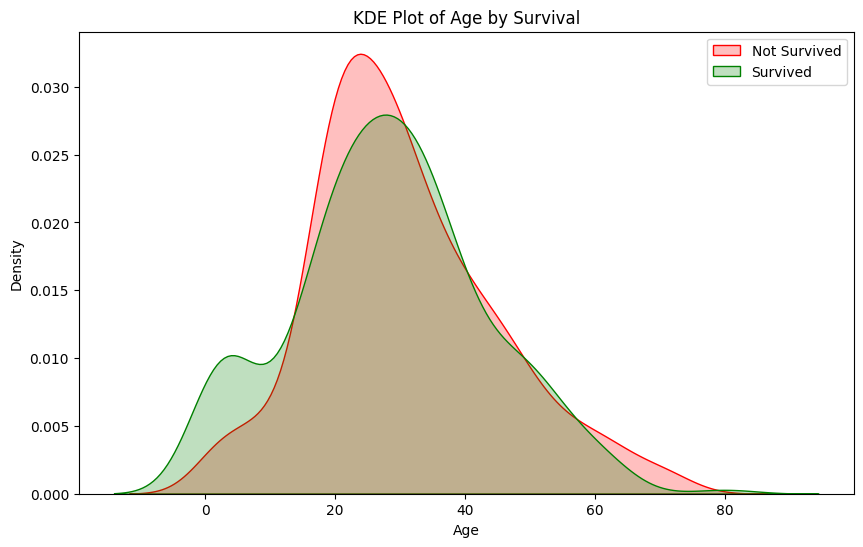

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True, color='red')
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True, color='green')
plt.title('KDE Plot of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Scatter plot of Age vs. Fare colored by Survival
This plot visualizes the relationship between age and fare, with points colored by survival status.

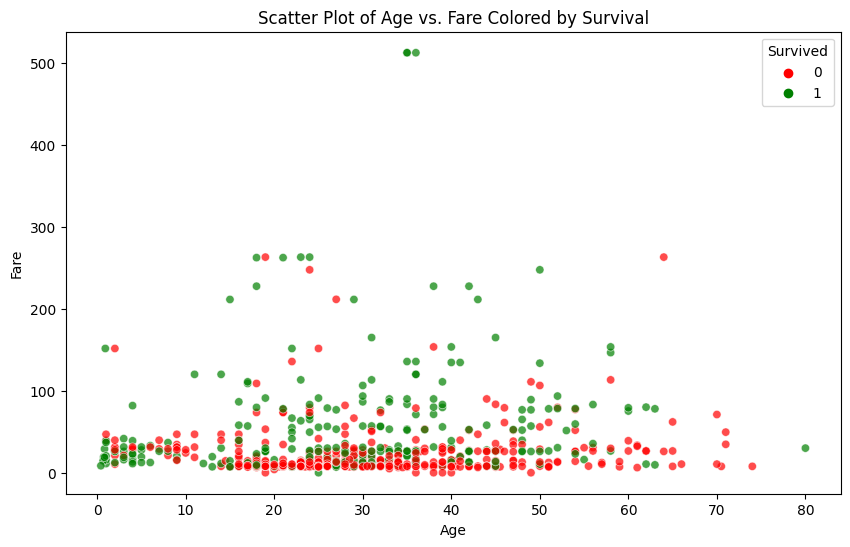

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette={0: 'red', 1: 'green'}, alpha=0.7)
plt.title('Scatter Plot of Age vs. Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Box plot of Age by Survival
The box plot shows the distribution of ages for passengers who survived and did not survive. It provides a summary of the central tendency, spread, and potential outliers in the age distribution for each survival group.

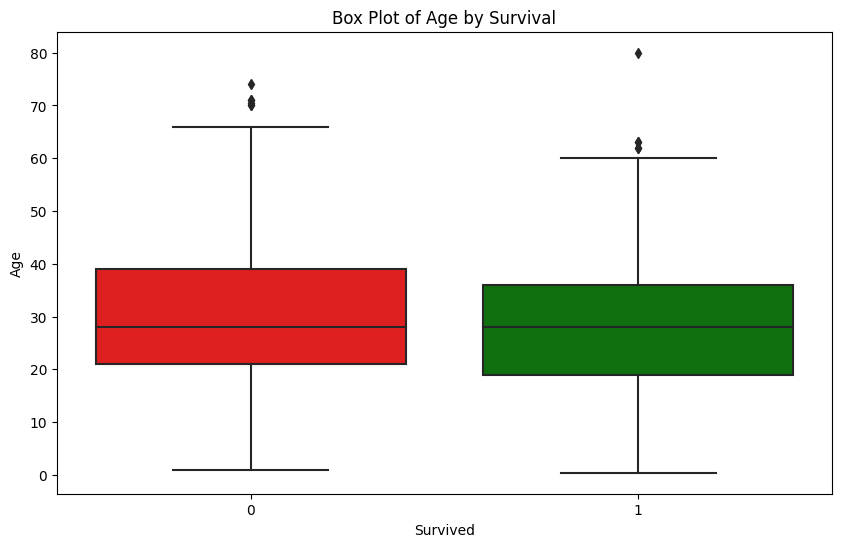

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette={0: 'red', 1: 'green'})
plt.title('Box Plot of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

### Violin plot of Age by Survival
The violin plot combines aspects of the box plot and KDE plot. It provides insights into the distribution of ages for both survival groups, showing the probability density at different age values.

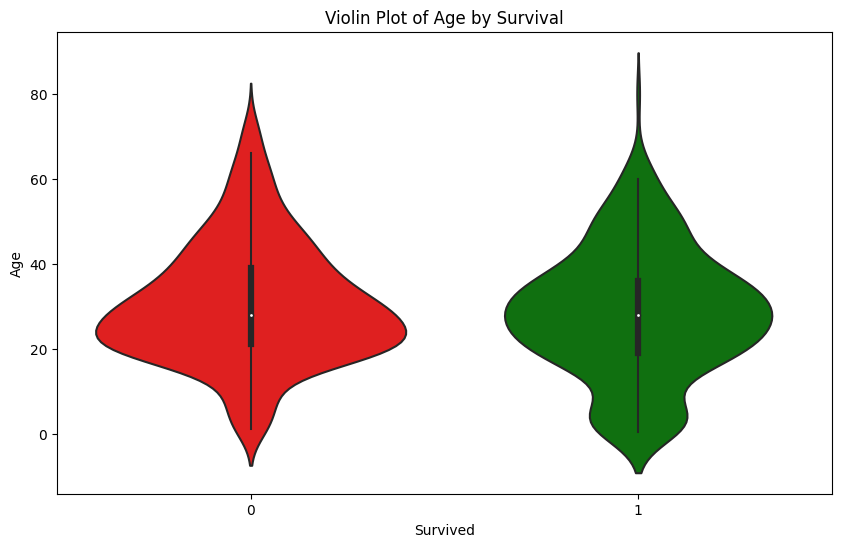

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette={0: 'red', 1: 'green'})
plt.title('Violin Plot of Age by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

### Survival Rate by Siblings/Spouses and Parents/Children

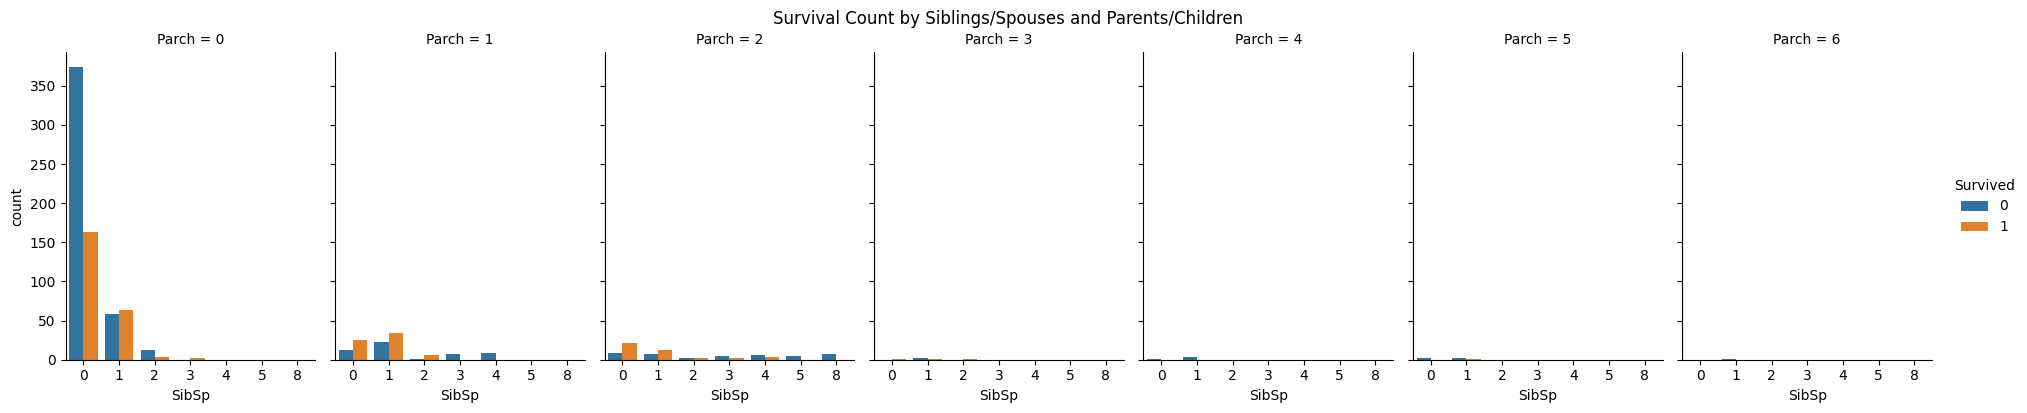

In [29]:
sns.catplot(x='SibSp', hue='Survived', col='Parch', data=df, kind='count', height=4, aspect=0.7)
plt.suptitle('Survival Count by Siblings/Spouses and Parents/Children', y=1.02)
plt.show()

### Countplot for Parents/Children with relationship to Survived

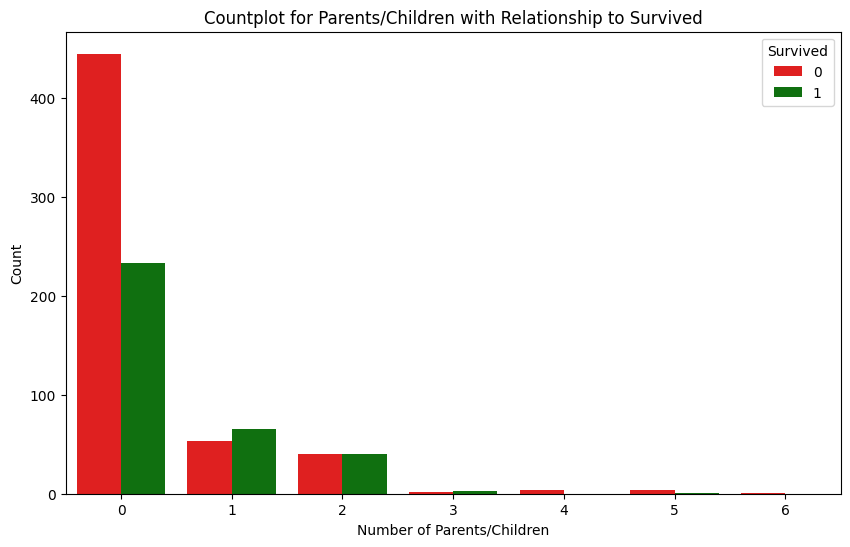

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Parents/Children with Relationship to Survived')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

### Survival Count by the Number of Siblings/Spouses:

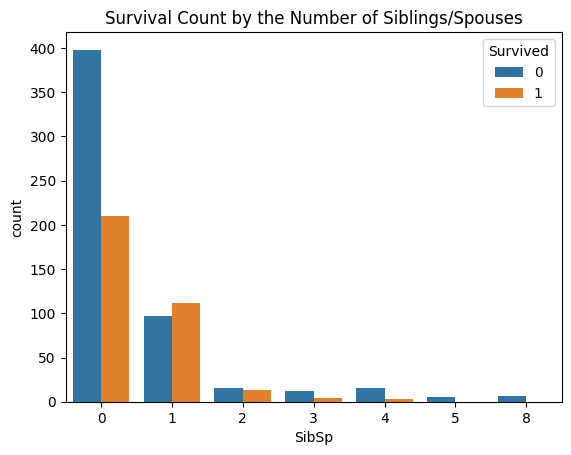

In [31]:
# Countplot showing the number of passengers who survived and didn't survive for each SibSp value
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count by the Number of Siblings/Spouses')
plt.show()

In [32]:
df[df['SibSp'] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,0-18
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,0-18
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,0-18
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,0-18
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,0-18


### Survival Rate by the Number of Siblings/Spouses with Age as Hue:1

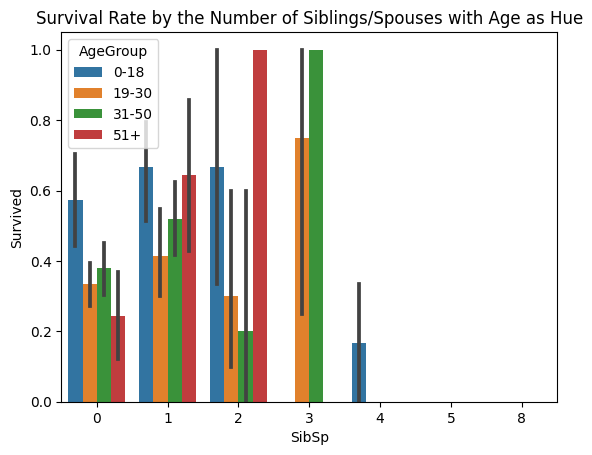

In [33]:
# Barplot with Age as hue, showing the survival rate for each SibSp value
sns.barplot(x='SibSp', y='Survived', hue='AgeGroup', data=df)
plt.title('Survival Rate by the Number of Siblings/Spouses with Age as Hue')
plt.show()

### Survival Rate by the Number of Siblings/Spouses with Passenger Class as Hue:

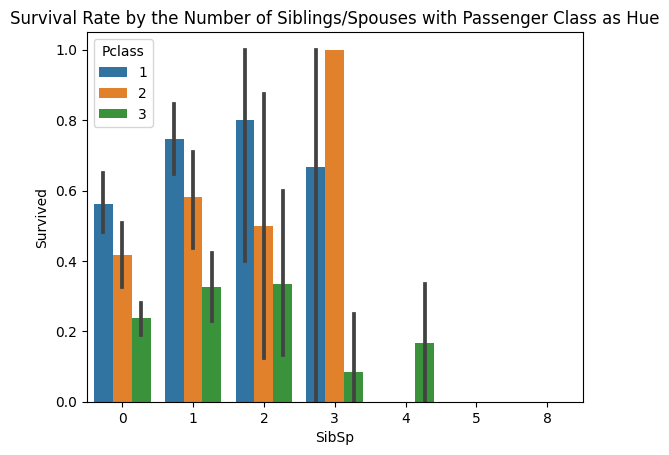

In [34]:
# Barplot with Passenger Class as hue, showing the survival rate for each SibSp value
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by the Number of Siblings/Spouses with Passenger Class as Hue')
plt.show()


### Countplot for categorical variables

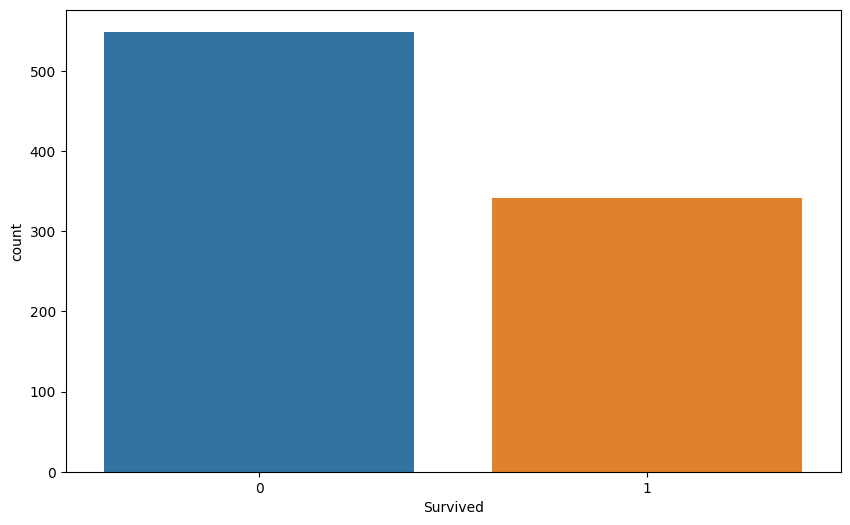

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.show()

### Countplot for Cabin (presence/absence) with relationship to Survived

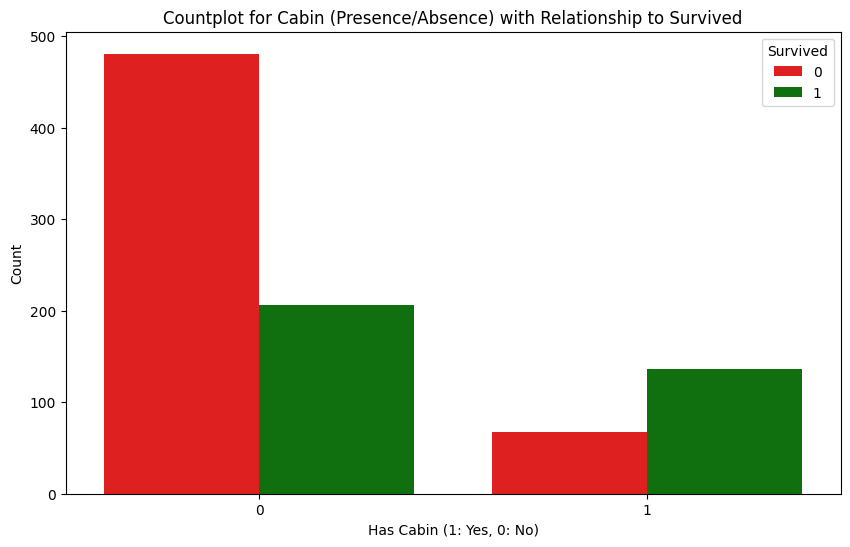

In [36]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCabin', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Cabin (Presence/Absence) with Relationship to Survived')
plt.xlabel('Has Cabin (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

### Countplot for Number of Cabins with relationship to Survived

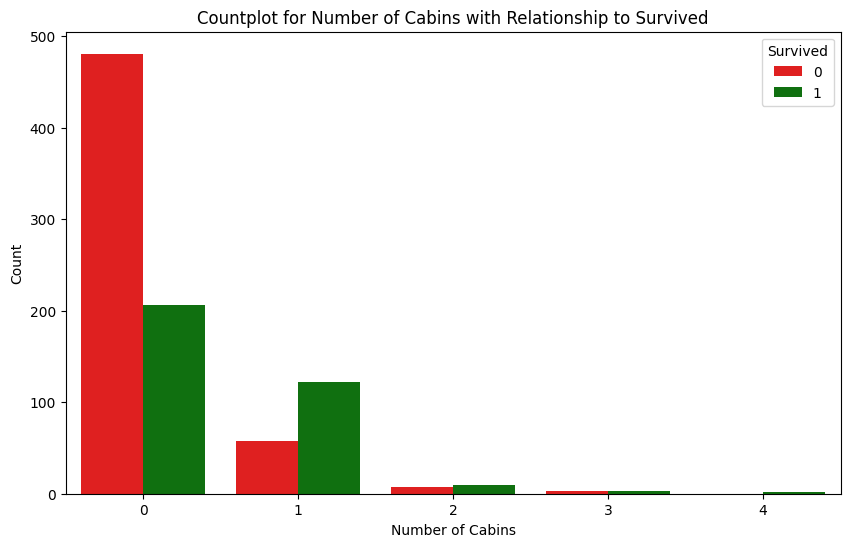

In [37]:
df['NumCabins'] = df['Cabin'].str.split().apply(lambda x: len(x) if type(x) == list else 0)
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCabins', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Number of Cabins with Relationship to Survived')
plt.xlabel('Number of Cabins')
plt.ylabel('Count')
plt.show()

### Countplot for Ticket Type with relationship to Survived

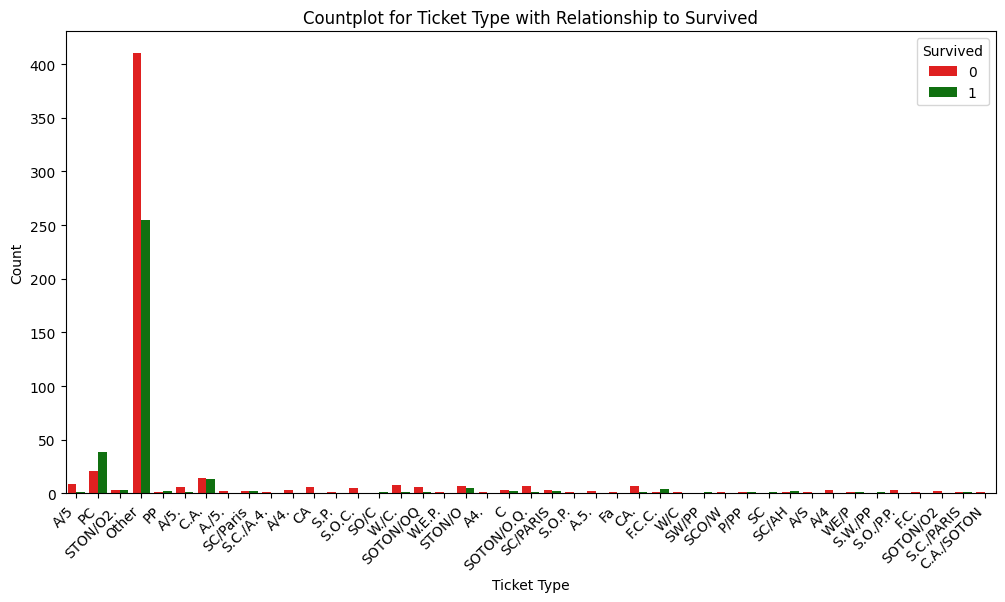

In [38]:
df['TicketType'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'Other')
plt.figure(figsize=(12, 6))
sns.countplot(x='TicketType', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Ticket Type with Relationship to Survived')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### Countplot for Travel Alone with relationship to Survived

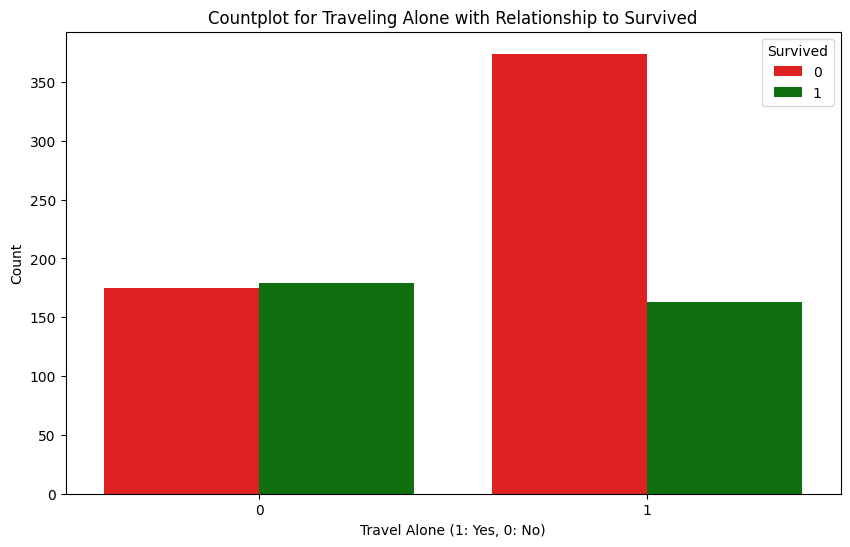

In [39]:
df['TravelAlone'] = np.where((df['SibSp'] + df['Parch']) == 0, 1, 0)
plt.figure(figsize=(10, 6))
sns.countplot(x='TravelAlone', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Countplot for Traveling Alone with Relationship to Survived')
plt.xlabel('Travel Alone (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Test 1:

### DROPPED ALL CATEGORICAL AND NULL VALUES  

In [40]:
# Read the Titanic dataset from a CSV file
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Drop unnecessary columns ('Name','Sex','Ticket','Cabin','Embarked')
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [42]:
# Drop rows with missing values
df=df.dropna()

<Axes: >

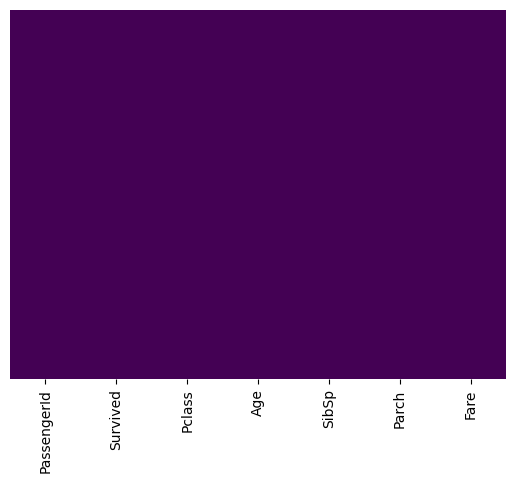

In [43]:
# create heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

In [45]:
# Create a function for LogisticRegression
def lr_process():
    global X,y
    X=df.drop('Survived',axis=1)
    y=df['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
    lr=LogisticRegression(penalty='l1',solver='liblinear')
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)

    
    print(classification_report(y_test,y_pred))

lr_process()

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       123
           1       0.66      0.46      0.54        92

    accuracy                           0.67       215
   macro avg       0.66      0.64      0.64       215
weighted avg       0.66      0.67      0.65       215



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [47]:
def run_classification_algorithms():
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a list of classifiers
    classifiers = [
        ('Random Forest', RandomForestClassifier()),
        ('Logistic Regression', LogisticRegression()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier()),
        ('Neural Network', MLPClassifier())
    ]

    best_model_name = None
    best_model_accuracy = 0
    best_model_classification_report = ""

    # Iterate through each classifier
    for name, classifier in classifiers:
        # Fit the model
        classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = classifier.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Display accuracy for each model
        print(f"Algorithm: {name}")
        print(f"Accuracy: {accuracy:.2f}\n")

        # Check if the current model is the best one
        if accuracy > best_model_accuracy:
            best_model_accuracy = accuracy
            best_model_name = name
            best_model_classification_report = classification_report(y_test, y_pred)

    # Display the classification report for the best model
    print(f"Best Model: {best_model_name}")
    print("Best Model Classification Report:\n", best_model_classification_report)
    print(f"Best Model Accuracy: {best_model_accuracy:.2f}\n")

# Assuming df is your DataFrame
run_classification_algorithms()


Algorithm: Random Forest
Accuracy: 0.67

Algorithm: Logistic Regression
Accuracy: 0.70

Algorithm: Support Vector Machine
Accuracy: 0.65

Algorithm: K-Nearest Neighbors
Accuracy: 0.59

Algorithm: Decision Tree
Accuracy: 0.66

Algorithm: Naive Bayes
Accuracy: 0.66

Algorithm: Gradient Boosting
Accuracy: 0.70

Algorithm: XGBoost
Accuracy: 0.66

Algorithm: Neural Network
Accuracy: 0.71

Best Model: Neural Network
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        87
           1       0.71      0.43      0.53        56

    accuracy                           0.71       143
   macro avg       0.71      0.66      0.66       143
weighted avg       0.71      0.71      0.69       143

Best Model Accuracy: 0.71



# Test 2:

### DROPPED NULL VALUES & COVERTED CATEGORICAL INTO NUMERICAL VALUES (GENDER & EMBARKED)

In [48]:
# Read the Titanic dataset from a CSV file
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Drop unnecessary columns (Name, Ticket, Cabin)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [50]:
# Drop rows with missing values
df = df.dropna()

In [51]:
# Create dummy variables for the 'Embarked' column and drop the original column
df[['Q', 'S']] = pd.get_dummies(df['Embarked'], drop_first=True)

In [52]:
# Create a binary variable for 'Sex' (1 for Male, 0 for Female) and drop the original column
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [53]:
# Drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

#### Heatmap

<Axes: >

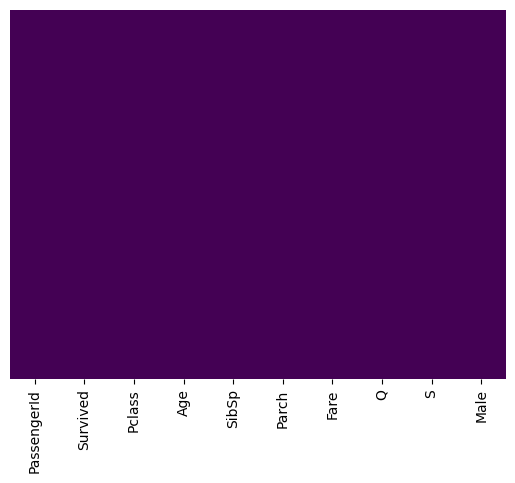

In [54]:
# create heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Survival Rate by Gender:

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Male'>

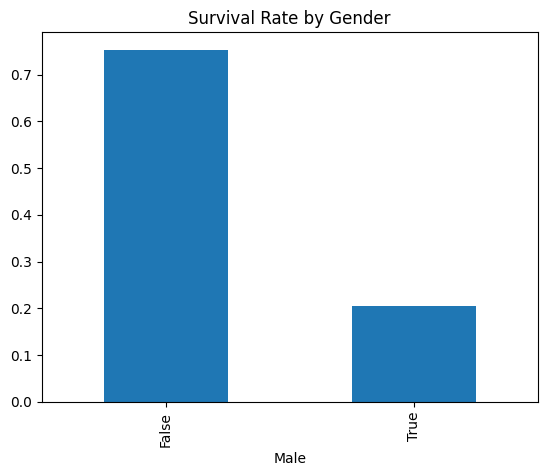

In [55]:
df.groupby('Male')['Survived'].mean().plot(kind='bar', title='Survival Rate by Gender')

#### Survival Rate by Port

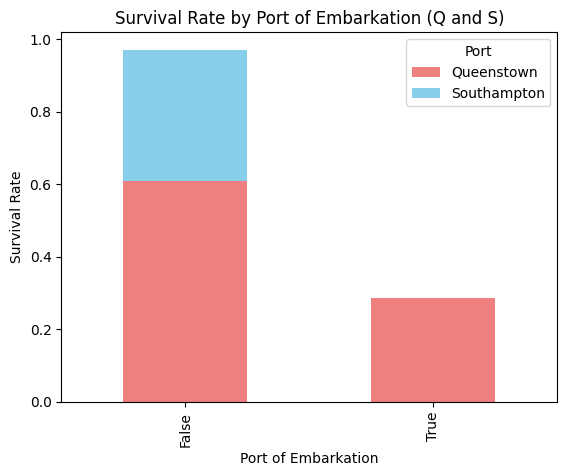

In [56]:
# Group by 'Q' and 'S', calculate the mean survival rate, and plot a bar graph
df.groupby(['Q', 'S'])['Survived'].mean().unstack().plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Survival Rate by Port of Embarkation (Q and S)')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.legend(title='Port', labels=['Queenstown', 'Southampton'])
plt.show()

#### Age Distribution of Passengers:

<Axes: >

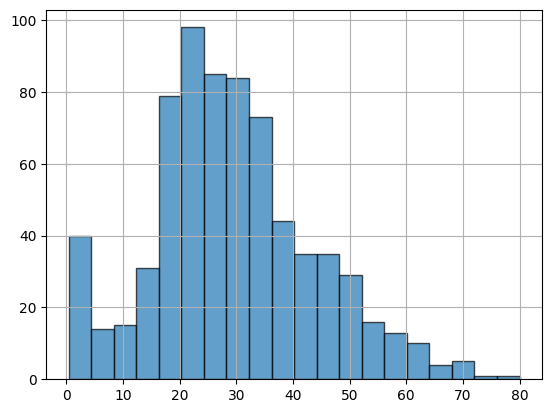

In [57]:
df['Age'].hist(bins=20, edgecolor='black', alpha=0.7)

#### Correlation Heatmap:

Text(0.5, 1.0, 'Correlation Heatmap')

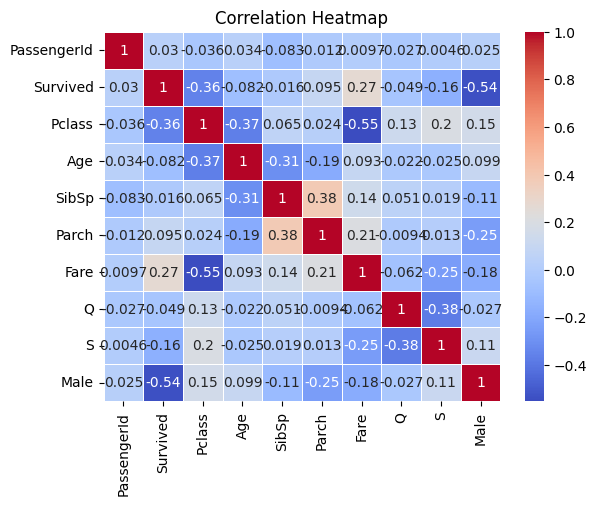

In [58]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

In [59]:
# function created in Test 1
lr_process()

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       128
           1       0.73      0.71      0.72        86

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [60]:
# Result of all algorithm 
run_classification_algorithms()

Algorithm: Random Forest
Accuracy: 0.80

Algorithm: Logistic Regression
Accuracy: 0.78

Algorithm: Support Vector Machine
Accuracy: 0.63

Algorithm: K-Nearest Neighbors
Accuracy: 0.63

Algorithm: Decision Tree
Accuracy: 0.71

Algorithm: Naive Bayes
Accuracy: 0.77

Algorithm: Gradient Boosting
Accuracy: 0.79

Algorithm: XGBoost
Accuracy: 0.76

Algorithm: Neural Network
Accuracy: 0.77

Best Model: Random Forest
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143

Best Model Accuracy: 0.80



# Test 3:

### Filled Age Null Values with Average Age

In [61]:
# Read the Titanic dataset from a CSV file
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Drop unnecessary columns (Name, Ticket, Cabin)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [63]:
# Create dummy variables for the 'Embarked' column and drop the original column
df[['Q', 'S']] = pd.get_dummies(df['Embarked'], drop_first=True)

In [64]:
# Create a binary variable for 'Sex' (1 for Male, 0 for Female) and drop the original column
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [65]:
# Drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [66]:
# Fill missing values in 'Age' with the average age
for i in df.index:
    if pd.isna(df['Age'][i]):
        df.at[i, 'Age'] = np.average(df['Age'].dropna())

## Explore the data

### Heatmap for chiging null values

<Axes: >

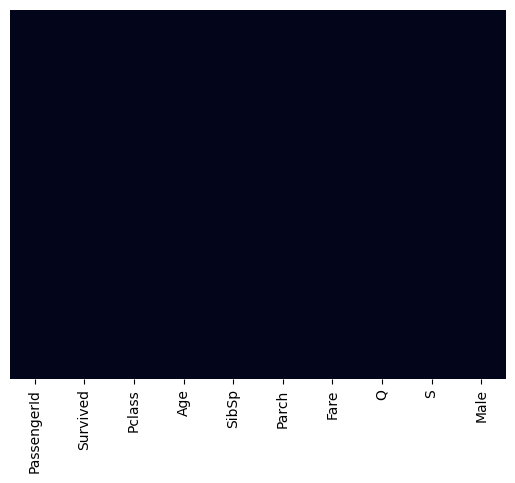

In [67]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

### 1. Survival Rate by Gender

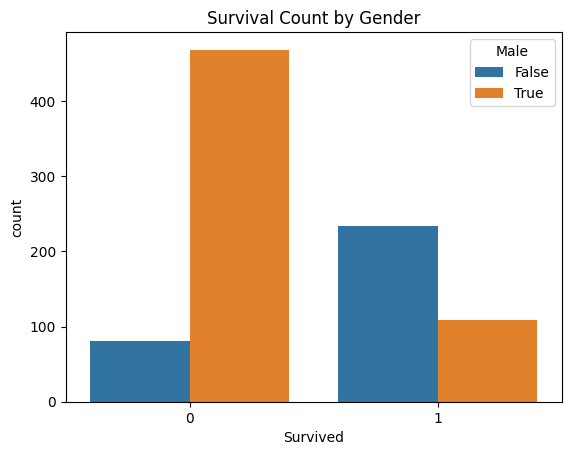

In [68]:
sns.countplot(x='Survived', hue='Male', data=df)
plt.title('Survival Count by Gender')
plt.show()

### 2. Survival Rate by Passenger Class

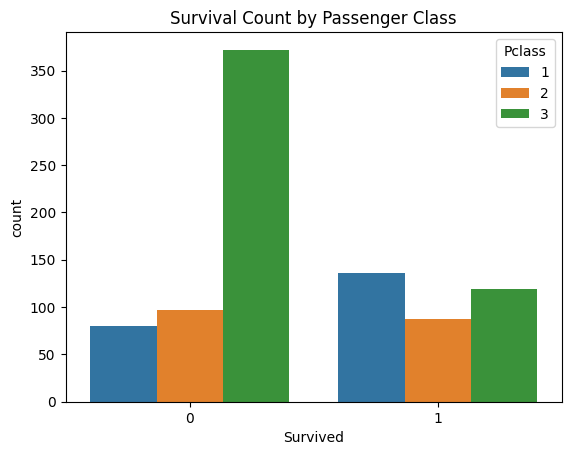

In [69]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

### 3. Age Distribution of Passengers

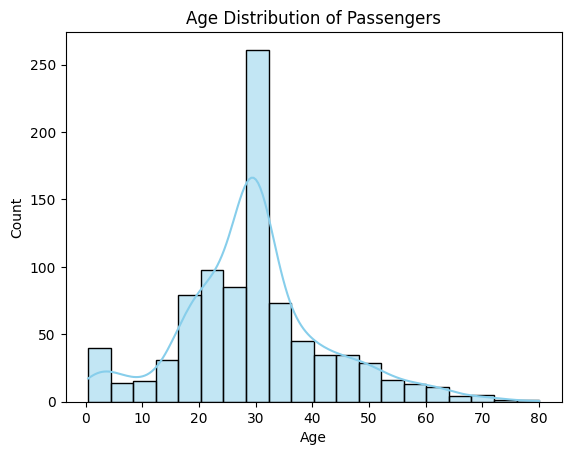

In [70]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

### 4. Correlation Heatmap

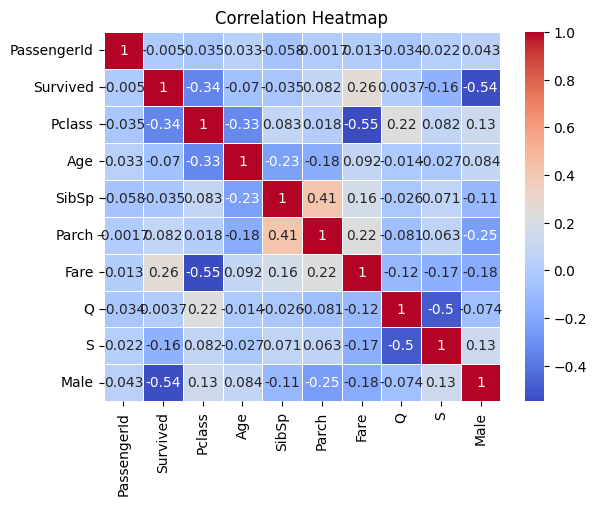

In [71]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 5. Survival Rate by Port of Embarkation

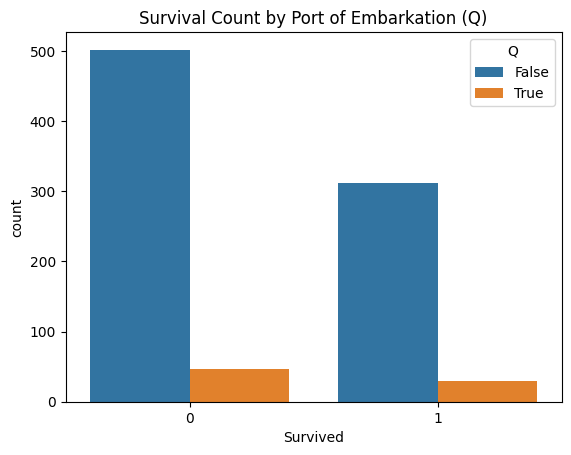

In [72]:
sns.countplot(x='Survived', hue='Q', data=df)
plt.title('Survival Count by Port of Embarkation (Q)')
plt.show()

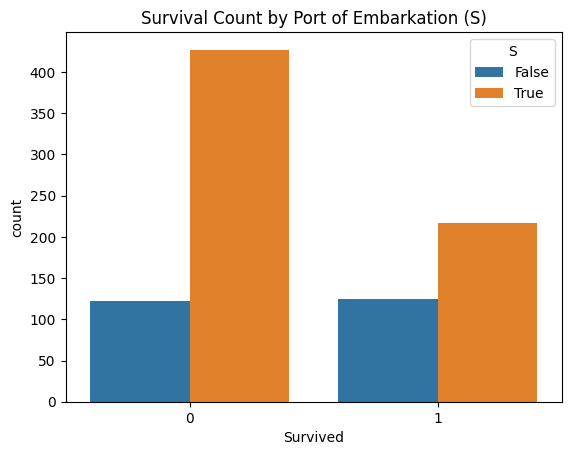

In [73]:
sns.countplot(x='Survived', hue='S', data=df)
plt.title('Survival Count by Port of Embarkation (S)')
plt.show()

In [74]:
# function created in Test 1
lr_process()

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [75]:
# Result of all algorithm 
run_classification_algorithms()

Algorithm: Random Forest
Accuracy: 0.82

Algorithm: Logistic Regression
Accuracy: 0.78

Algorithm: Support Vector Machine
Accuracy: 0.60

Algorithm: K-Nearest Neighbors
Accuracy: 0.66

Algorithm: Decision Tree
Accuracy: 0.75

Algorithm: Naive Bayes
Accuracy: 0.77

Algorithm: Gradient Boosting
Accuracy: 0.82

Algorithm: XGBoost
Accuracy: 0.79

Algorithm: Neural Network
Accuracy: 0.78

Best Model: Random Forest
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Best Model Accuracy: 0.82



# Test 4:

### Filled Age Null Values with Median Age

In [76]:
# Load the dataset
df = pd.read_csv('titanic_train.csv')

In [77]:
# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [78]:
# Handle missing values in the 'Age' column by filling them with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [79]:
# Create dummy variables for 'Embarked' and 'Sex'
df[['Q', 'S']] = pd.get_dummies(df['Embarked'], drop_first=True)
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [80]:
# Drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

### Visualize survival counts

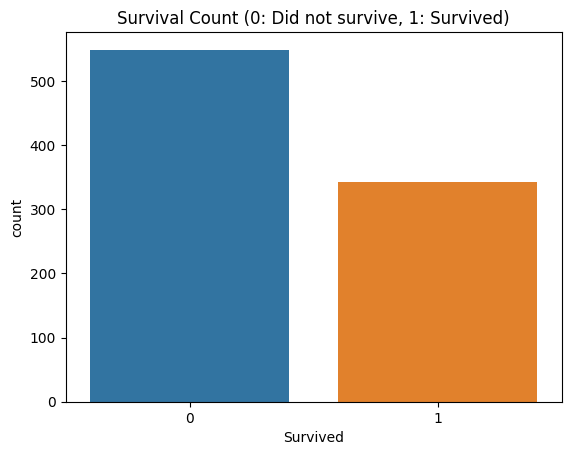

In [81]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0: Did not survive, 1: Survived)')
plt.show()

### Visualize survival based on Pclass

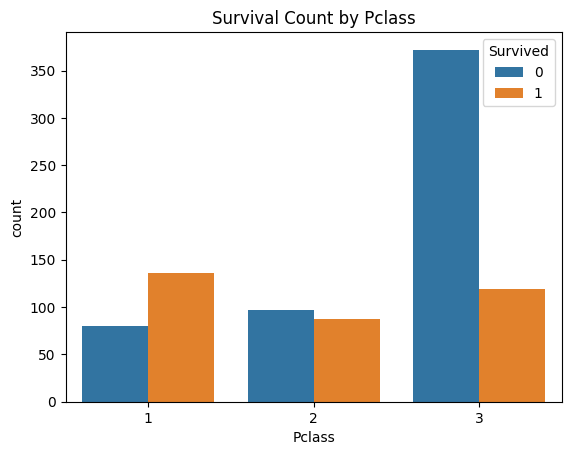

In [82]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

### Visualize survival based on Sex

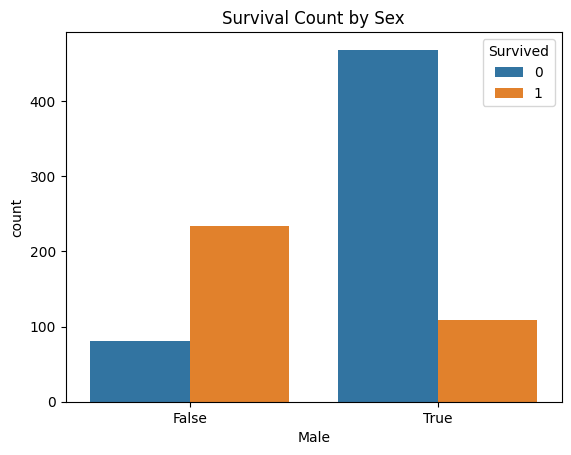

In [83]:
sns.countplot(x='Male', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

### Visualize age distribution

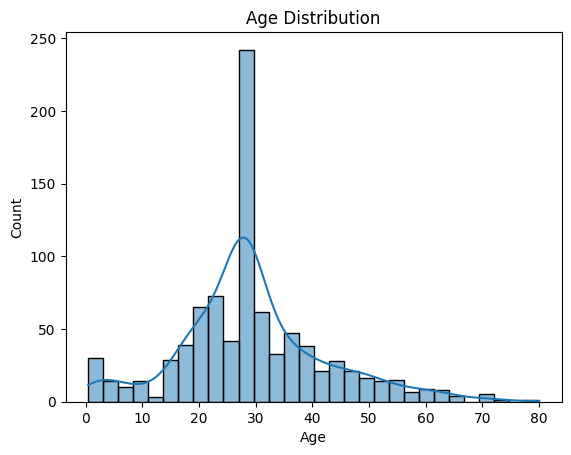

In [84]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Visualize fare distribution

### Correlation matrix

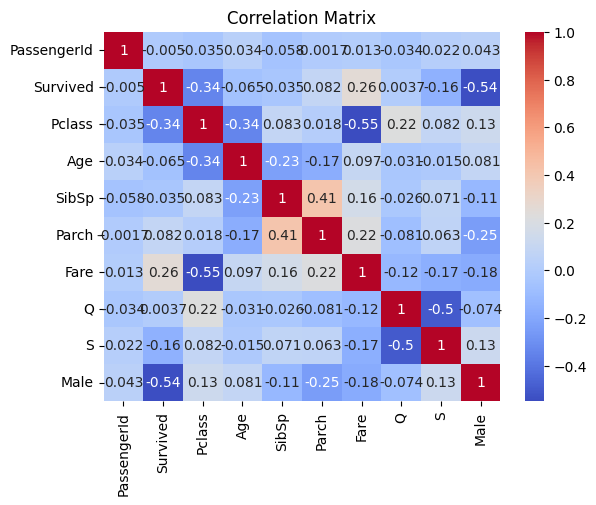

In [85]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [86]:
# function created in Test 1
lr_process()

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [87]:
# Result of all algorithm 
run_classification_algorithms()

Algorithm: Random Forest
Accuracy: 0.83

Algorithm: Logistic Regression
Accuracy: 0.80

Algorithm: Support Vector Machine
Accuracy: 0.60

Algorithm: K-Nearest Neighbors
Accuracy: 0.66

Algorithm: Decision Tree
Accuracy: 0.74

Algorithm: Naive Bayes
Accuracy: 0.77

Algorithm: Gradient Boosting
Accuracy: 0.80

Algorithm: XGBoost
Accuracy: 0.79

Algorithm: Neural Network
Accuracy: 0.74

Best Model: Random Forest
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Best Model Accuracy: 0.83



# Test 5

### Filled Age Null Values with Mode Age

In [88]:
# Read the Titanic dataset from a CSV file
df = pd.read_csv('titanic_train.csv')

In [89]:
# Drop unnecessary columns 'Name', 'Ticket', and 'Cabin'
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [90]:
# Create dummy variables for the 'Embarked' column and drop the first one to avoid multicollinearity
df[['Q', 'S']] = pd.get_dummies(df['Embarked'], drop_first=True)

In [91]:
# Create a dummy variable for the 'Sex' column and drop the first one to represent male (1 for male, 0 for female)
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [92]:
# Drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [93]:
# Fill missing values in the 'Age' column with the value 24
for i in df.index:
    if str(df['Age'][i]) == 'nan':
        df.at[i, 'Age'] = 24
        

### Countplot for the 'Survived' column

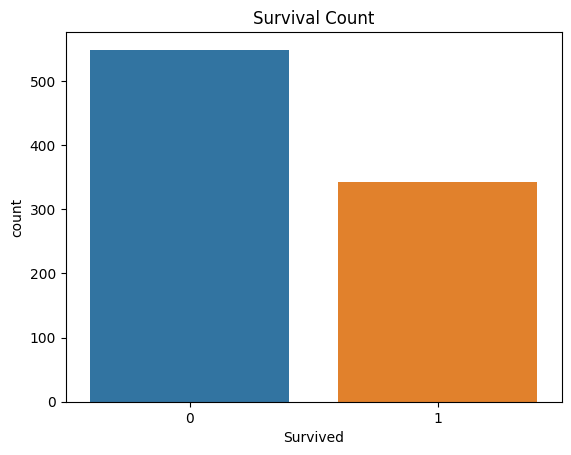

In [94]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

### Boxplot for 'Age' distribution

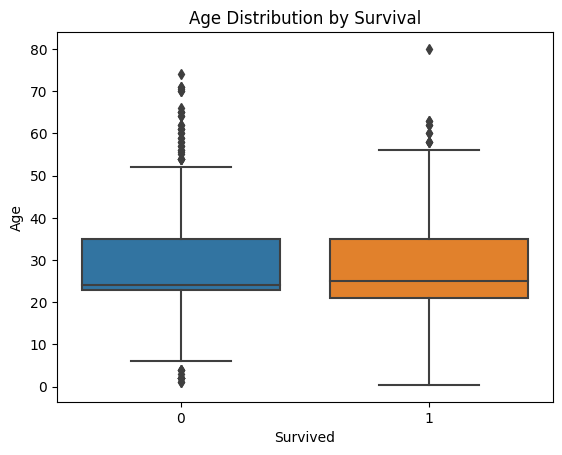

In [95]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

### Countplot for 'Pclass' distribution

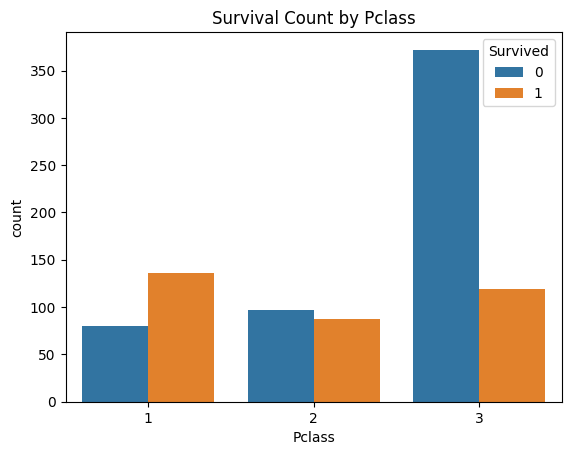

In [96]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()

### Pairplot to visualize relationships between numerical variables

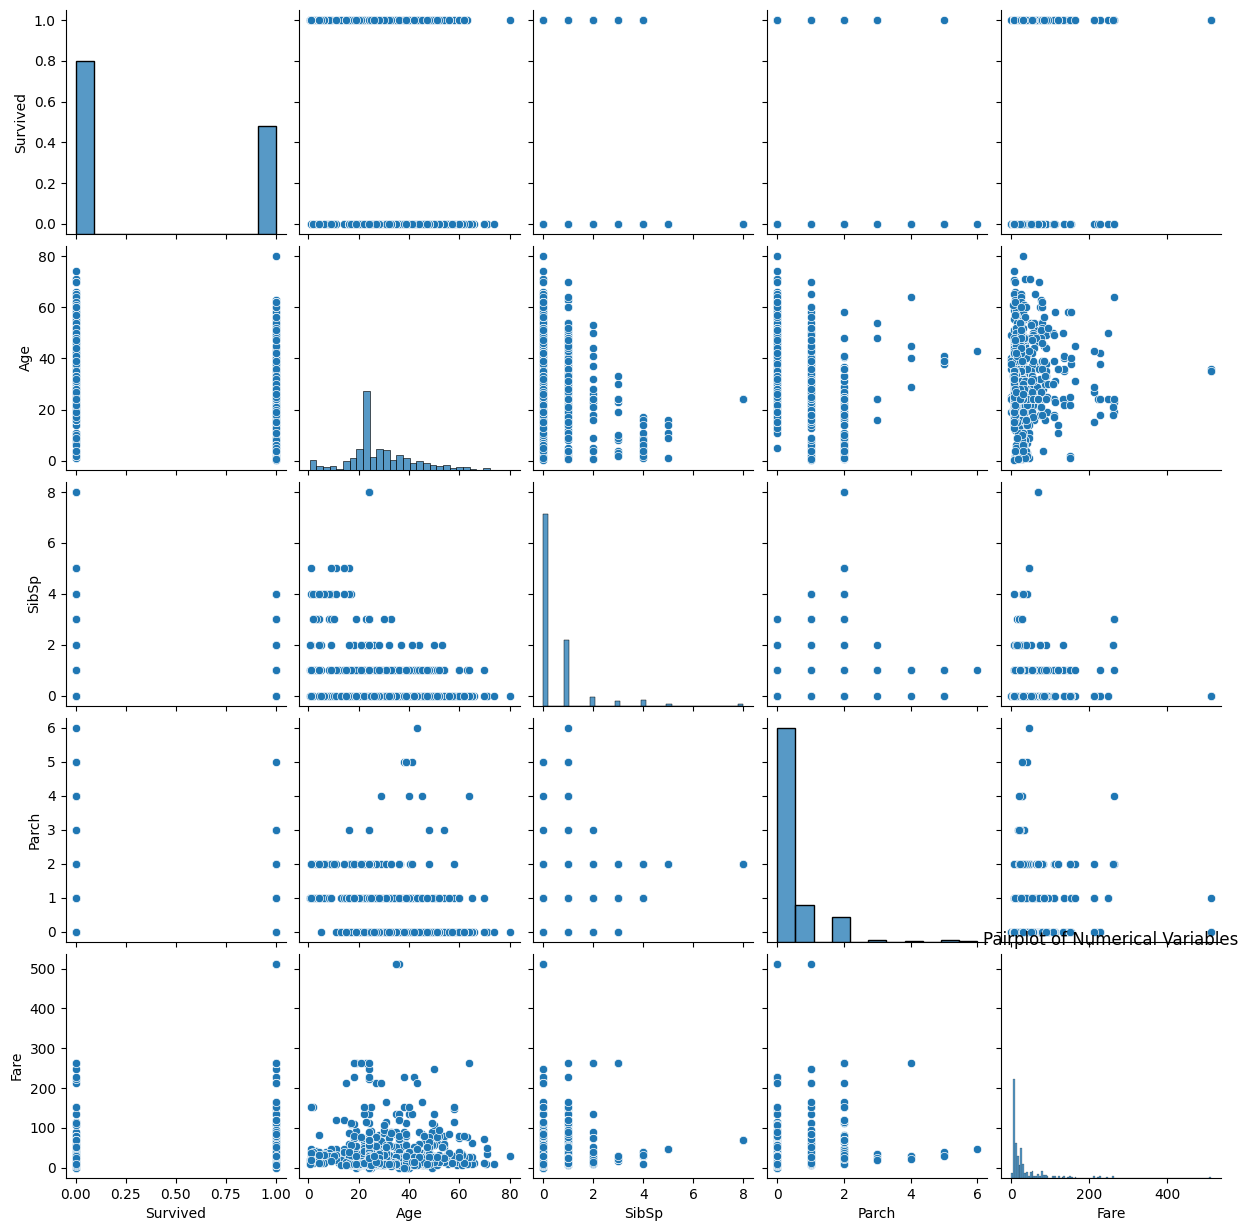

In [97]:
sns.pairplot(df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.title('Pairplot of Numerical Variables')
plt.show()

### Correlation heatmap

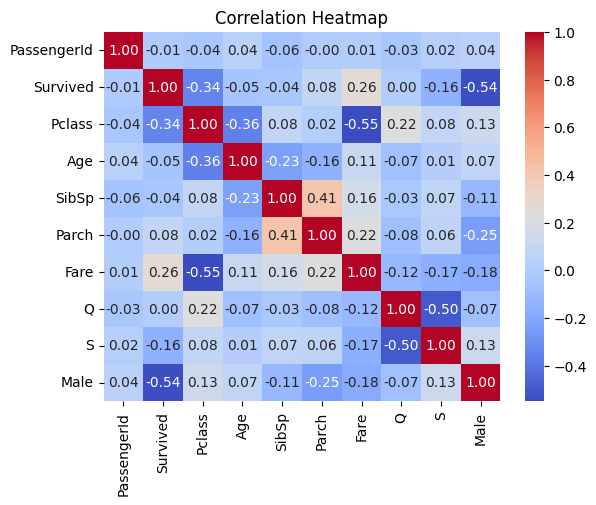

In [98]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [99]:
# function created in Test 1
lr_process()

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [100]:
# Result of all algorithm 
run_classification_algorithms()

Algorithm: Random Forest
Accuracy: 0.82

Algorithm: Logistic Regression
Accuracy: 0.78

Algorithm: Support Vector Machine
Accuracy: 0.60

Algorithm: K-Nearest Neighbors
Accuracy: 0.67

Algorithm: Decision Tree
Accuracy: 0.74

Algorithm: Naive Bayes
Accuracy: 0.77

Algorithm: Gradient Boosting
Accuracy: 0.82

Algorithm: XGBoost
Accuracy: 0.80

Algorithm: Neural Network
Accuracy: 0.76

Best Model: Random Forest
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Best Model Accuracy: 0.82



# Test 6:

## Null Age Filled According to Pclass

In [101]:
# Step 1: Read the CSV file
df = pd.read_csv('titanic_train.csv')

<Axes: xlabel='Pclass', ylabel='Age'>

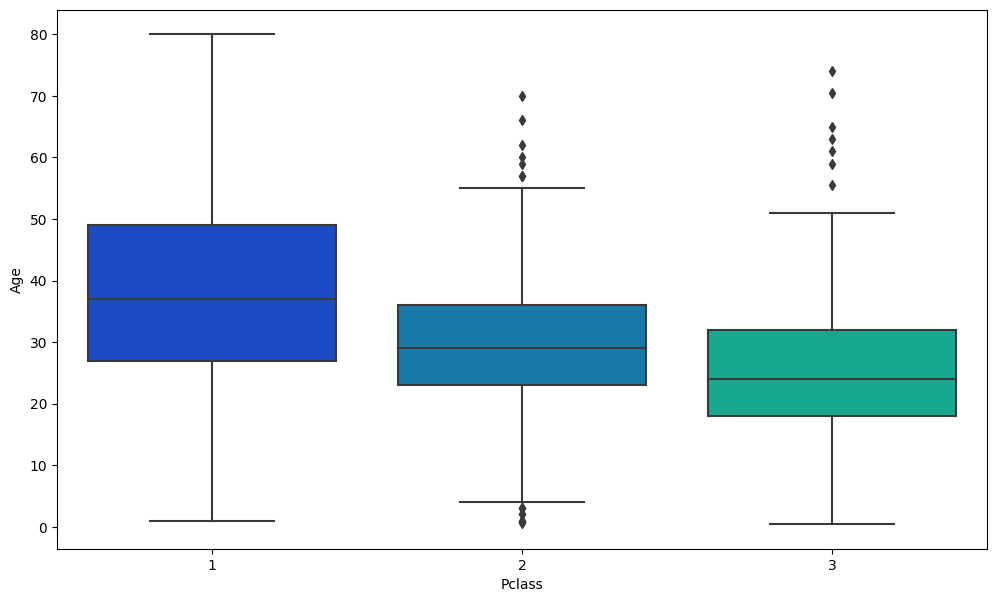

In [102]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [103]:
# Step 2: Drop unnecessary columns (Name, Ticket, Cabin)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [104]:
# Step 3: Create dummy variables for 'Embarked' and 'Sex'
df[['Q', 'S']] = pd.get_dummies(df['Embarked'], drop_first=True)
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [105]:
# Step 4: Drop the original 'Sex' and 'Embarked' columns
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [106]:
# Step 5: Impute missing values in 'Age' column using a custom function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

### Survival Rate by Gender

In [107]:
df.groupby('Male')['Survived'].mean()

Male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

### Survival Rate by Class

In [108]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Distribution of Ages using a histogram

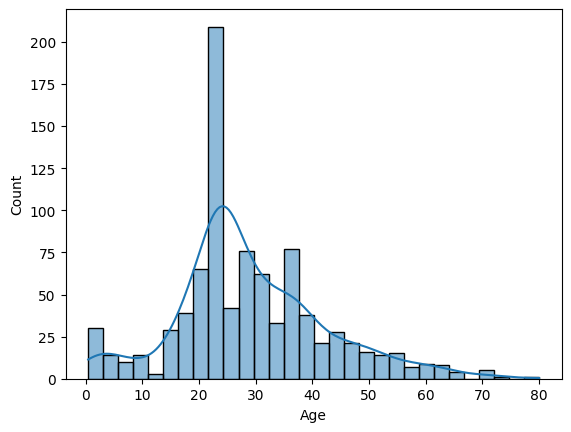

In [109]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

### Correlation Matrix heatmap

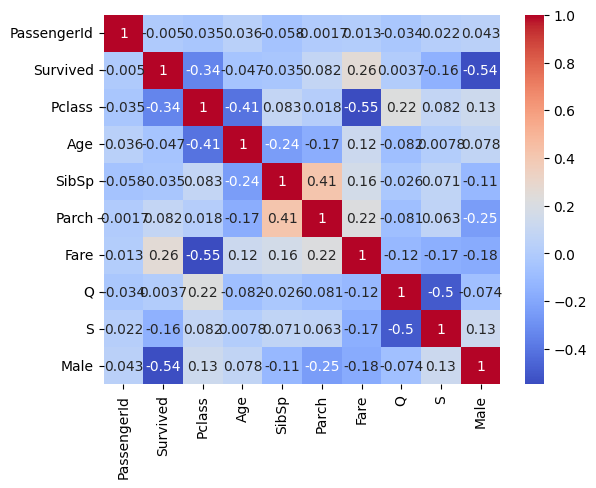

In [110]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Countplot of Survived vs. Not Survived

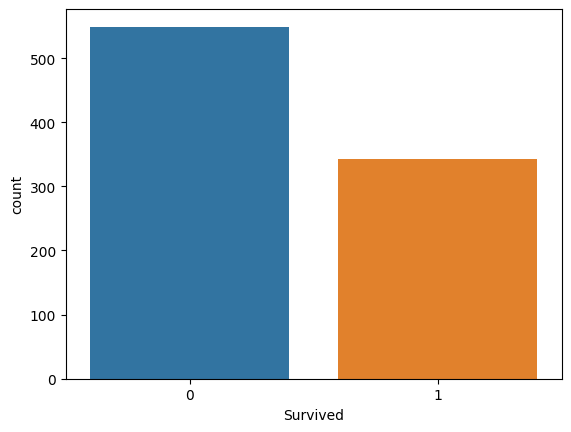

In [111]:
sns.countplot(x='Survived', data=df)
plt.show()

In [112]:
# function created in Test 1
lr_process()

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.66      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [113]:
# Result of all algorithm 
run_classification_algorithms()

Algorithm: Random Forest
Accuracy: 0.81

Algorithm: Logistic Regression
Accuracy: 0.77

Algorithm: Support Vector Machine
Accuracy: 0.60

Algorithm: K-Nearest Neighbors
Accuracy: 0.67

Algorithm: Decision Tree
Accuracy: 0.77

Algorithm: Naive Bayes
Accuracy: 0.77

Algorithm: Gradient Boosting
Accuracy: 0.82

Algorithm: XGBoost
Accuracy: 0.79

Algorithm: Neural Network
Accuracy: 0.68

Best Model: Gradient Boosting
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Best Model Accuracy: 0.82



# Grid Function

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Read the CSV file
df = pd.read_csv('titanic_train.csv')

# Drop irrelevant columns for training the model
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing numerical and categorical columns separately
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Sex', 'Embarked']

# Create pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with a preprocessor and a Logistic Regression classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define the parameter grid to search through
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Best Parameters:  {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Accuracy: 79.49%
Test Accuracy: 79.89%


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Read the CSV file
df = pd.read_csv('titanic_train.csv')

# Drop irrelevant columns for training the model
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing numerical and categorical columns separately
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Sex', 'Embarked']

# Create pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with a preprocessor and an SVM classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Define the parameter grid to search through
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Best Parameters:  {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best Accuracy: 82.58%
Test Accuracy: 81.56%
